In [3]:
# 환자의 치료 전과 후를 비교하여 효과성을 평가하는 코드 실습
# 데이터 -> 랜덤 더미 데이터

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

치료 전 후 데이터 랜덤하게 생성

In [5]:
pre_treatment = np.random.randint(1,10,size=20)
post_treatment = pre_treatment + np.random.randint(-3,4,size=20)

데이터 프레임으로 저장

In [6]:
data = pd.DataFrame({'pre_treatment':pre_treatment,'post_treatment':post_treatment})
data.to_csv('../00_DataEx/99_Output/treatment_data.csv',index=False)

치료 전과 후를 비교하여 효과성을 평가하는 코드

In [9]:
# 데이터 불러오기
data = pd.read_csv('../00_DataEx/99_Output/treatment_data.csv')

# 윌콕는 부호 순위 검정 수행
stat, p = wilcoxon(data['pre_treatment'],data['post_treatment'])

# 결과 출력
print('Statistic : ', stat)
print('P-Value : ',p)
if p > 0.05:
    print('Same distribution (fail to reject H0)')
else : 
    print('Different distribution (reject H0)')

Statistic :  66.0
P-Value :  0.9164260792071334
Same distribution (fail to reject H0)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


효과성을 평가하는 코드 실습

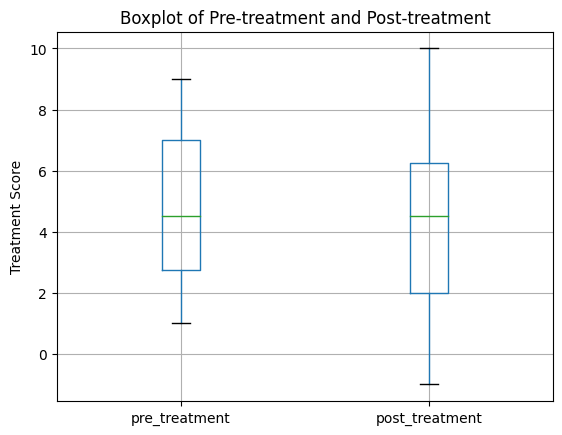

In [11]:
import matplotlib.pyplot as plt

# Boxplot 그리기
fig,ax =plt.subplots()
data.boxplot(['pre_treatment','post_treatment'],ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()

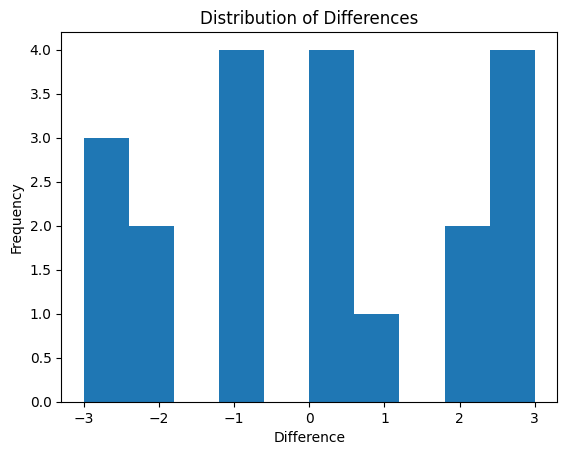

In [12]:
# 두 변수의 차이에 대한 분포를 시각화
fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()